# Esame Laboratorio di Programmazione II - 28/08/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e sul nome con cui salvate il file la vostra matricola.

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domanda e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza ettichette sugli assi o illleggibili sarà valutato meno bene di uno con ettichette chiare.

Commentate il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

In [352]:
#Potete importare direttamente qui le librerie che userete
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

## Esercizio 1

Supponiamo che i seguenti valori rappresentino il numero di ore di sonno dormite ogni notte nelle ultime **due settimane**:  
**6.5, 5.0, 7.8, 8.2, 4.9, 6.0, 7.0, 7.5, 6.8, 5.5, 8.0, 6.3, 7.2, 5.8**

1. Inserisci questi valori in un array NumPy

2. Crea un nuovo array che assegna un **punteggio di qualità del sonno** secondo le seguenti regole:
   - `1` se il sonno è **inferiore a 6 ore**
   - `2` se è **tra 6 ore (incluse) e meno di 8 ore**
   - `3` se è **8 ore o più**

3. Calcola la **percentuale di notti** per ciascuna fascia di qualità del sonno:
   - Percentuale di notti con punteggio **1** (meno di 6 ore)
   - Percentuale di notti con punteggio **2** (tra 6 e meno di 8 ore)
   - Percentuale di notti con punteggio **3** (8 ore o più)


In [345]:
# 1. array numpy
arr_sleep = np.array([6.5, 5.0, 7.8, 8.2, 4.9, 6.0, 7.0, 7.5, 6.8, 5.5, 8.0, 6.3, 7.2, 5.8], dtype=np.float64)
print('Array delle ore di sonno: ', arr_sleep)

# 2. assegnare un punteggio qualità alle ore di sonno
def sleep_score(h):
    return np.where(h < 6, 1, np.where(h < 8, 2, 3))

arr_quality = sleep_score(arr_sleep)
print('Array della qualità del sonno: ', arr_quality)

# 3. percentuale di notti in ciascuna fascia di qualità
tot = len(arr_quality)
perc_1 = np.sum(arr_quality == 1) / tot * 100
perc_2 = np.sum(arr_quality == 2) / tot * 100
perc_3 = np.sum(arr_quality == 3) / tot * 100
print('Percentuali per ciascuna fascia di qualità:')
print(f'1 = {perc_1:.2f}%')
print(f'2 = {perc_2:.2f}%')
print(f'3 = {perc_3:.2f}%')

Array delle ore di sonno:  [6.5 5.  7.8 8.2 4.9 6.  7.  7.5 6.8 5.5 8.  6.3 7.2 5.8]
Array della qualità del sonno:  [2 1 2 3 1 2 2 2 2 1 3 2 2 1]
Percentuali per ciascuna fascia di qualità:
1 = 28.57%
2 = 57.14%
3 = 14.29%


## Esercizio 2
Un’urna contiene 3 palline rosse e 2 blu. A ogni estrazione si rimette la pallina nell’urna.
Quindi ad esempio la propabilità di estarre una pallina rossa è 3/5.
1. Scrivi una funzione che simula N estrazioni e rappresentale con un array NumPy (1 = rosso, 0 = blu).  Esempio: estrazioni_palline(3) = array([0,0,1])
2. Calcola la proporzione cumulativa di palline rosse dopo 10, 20, 30, …, 100 estrazioni. Siignifica ad esempio che per N estrazioni, contiamo quante volte è uscita una pallina rossa e dividiamo per 10.
3. Fai un grafico dell’andamento della proporzione cumulativa in funzione del numero di estrazioni.



Estrazione di 100 palline: [1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0]
  Estrazioni | Rosse | Proporzione
----------------------------------
          10 |     9 |       0.90
          20 |    16 |       0.80
          30 |    24 |       0.80
          40 |    32 |       0.80
          50 |    36 |       0.72
          60 |    41 |       0.68
          70 |    44 |       0.63
          80 |    49 |       0.61
          90 |    55 |       0.61
         100 |    59 |       0.59


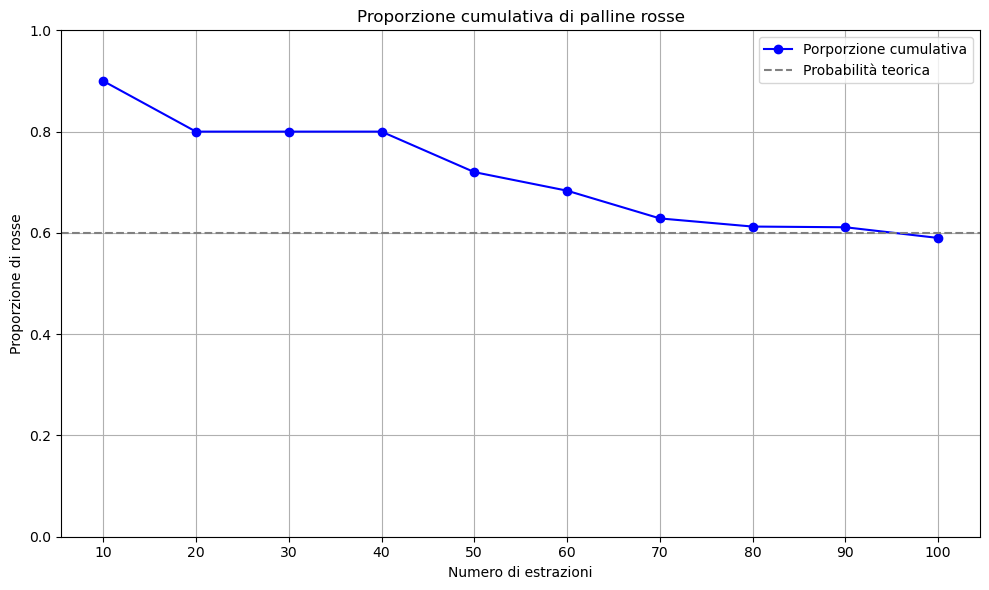

In [346]:
np.random.seed(0)
# 1. funzione che simula N estrazioni
def estrazioni_palline(N):
    return np.random.choice([0,1], size=N, p=[2/5, 3/5])


# 2. proporzione comulativa dopo 100 estrazioni
array = estrazioni_palline(100)
print(f'Estrazione di 100 palline: {array}')

estrazioni_cum = np.arange(10,101,10)
print(f"{'Estrazioni':>12} | {'Rosse':>5} | {'Proporzione':>11}")
print("-" * 34)
proporzioni = []
for i in estrazioni_cum:
    rosse = np.sum(array[:i])
    proporzione = rosse / i
    proporzioni.append(proporzione)
    print(f"{i:>12} | {rosse:>5} | {proporzione:>10.2f}")


# 3. grafico dell'andamento della proporzione cumulativa
plt.figure(figsize=(10,6))
plt.plot(estrazioni_cum, proporzioni, marker='o', linestyle='-', color='blue', label='Porporzione cumulativa')
plt.axhline(y=0.6, color='gray', linestyle='--', label='Probabilità teorica')
plt.title('Proporzione cumulativa di palline rosse')
plt.xlabel('Numero di estrazioni')
plt.ylabel('Proporzione di rosse')
plt.xticks(estrazioni_cum)
plt.ylim(0,1)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 8 x 8, con valori interi casuali compresi tra -20 e 20 (inclusi).

2. Per ogni riga, seleziona il numero **più vicino a 10**.

In [347]:
np.random.seed(0)
# 1. genera matrice 8x8 di interi casuali compresi tra -20 e 20
mat = np.random.randint(-20,21, size=(8,8))
print('Matrice 8x8 di numeri casuali tra -20 e 20\n',mat)

# 2. selezione del numero più vicino a 10 in ogni riga
closest = np.array([row[np.argmin(np.abs(row-10))] for row in mat])
print('\nNumeri più vicini a 10 per ogni riga: \n',closest)

Matrice 8x8 di numeri casuali tra -20 e 20
 [[-20 -17 -17  19 -11  -1   1  16]
 [  3 -14   4   4  -8 -19  18  19]
 [  3   4  -3  17   5  -7 -12 -11]
 [  0  -4 -15  -5 -20  -2  15   4]
 [  9  -1  -1  -6  19  12 -19 -11]
 [ 12  11 -10   3  15  -9   8  14]
 [-20 -20  16 -15  18  20  -3  -5]
 [-16  11 -19 -19  19  15  18  -9]]

Numeri più vicini a 10 per ogni riga: 
 [16  4  5 15  9 11 16 11]


## Esercizio 4  

Utilizza il dataset `movies.csv` (contenente colonne come `title`, `budget`, `revenue`, `vote_average`, `vote_count`).  

1. Elimina le righe con i valori mancanti. e **Crea una nuova colonna** `roi` (return on investment), definita come:  

   $$
   \texttt{roi} = \frac{\texttt{revenue} - \texttt{budget}}{\texttt{budget}}
   $$  

   *(Indica di quanto il film ha guadagnato rispetto al costo di produzione).*  

2. Trova i **5 film con ROI più alto** e stampa `title` e `roi`.  

3. **Filtra i film** che hanno:  
   - `budget` > 50 milioni  
   - `vote_average` > 7  

4. **Crea un grafico a barre** con i **10 film con ROI più alto**.  

5. **Crea uno scatter plot** con:  
   - asse x = `budget`  
   - asse y = `revenue`  
   - colore dei punti = `vote_average`  


Colonna Roi: 
 0          9.090192
1          1.522909
2          1.683984
3          9.340891
4          6.927628
            ...    
10595     22.111119
10689     11.835969
10724     10.710642
10759    232.333333
10760     51.222222
Name: roi, Length: 1446, dtype: float64

Top 5 film con ROI più alto
                original_title           roi
3608       From Prada to Nada  26880.720430
7447      Paranormal Activity  12889.386667
2449  The Blair Witch Project   9919.000000
3581  Love, Wedding, Marriage   1377.000000
242               The Gallows    425.644100

Film filtrati: 
                                   original_title     budget  vote_average
1                             Mad Max: Fury Road  150000000           7.1
3                   Star Wars: The Force Awakens  200000000           7.5
4                                      Furious 7  190000000           7.3
5                                   The Revenant  135000000           7.2
7                                    The Ma

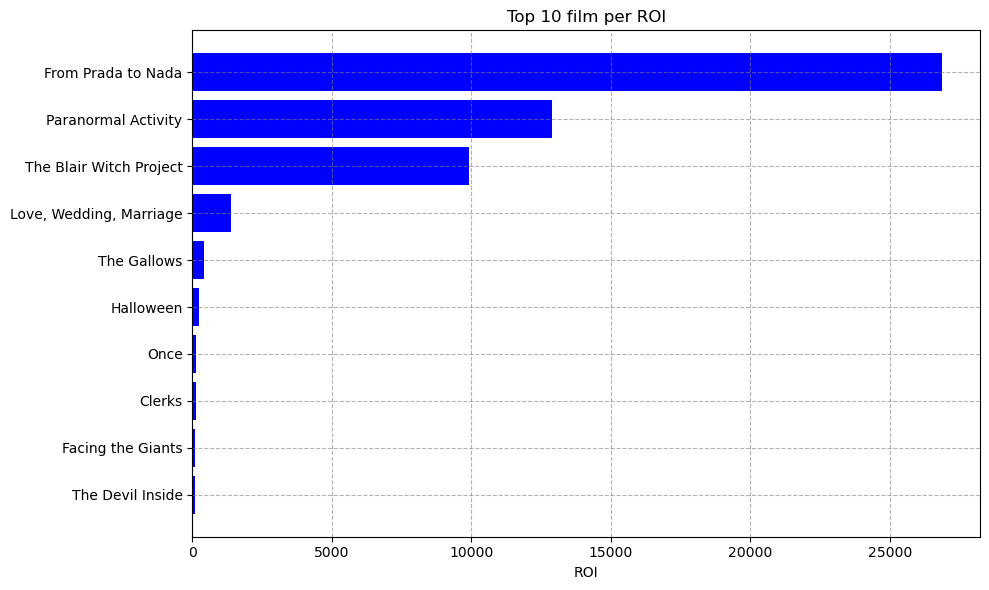

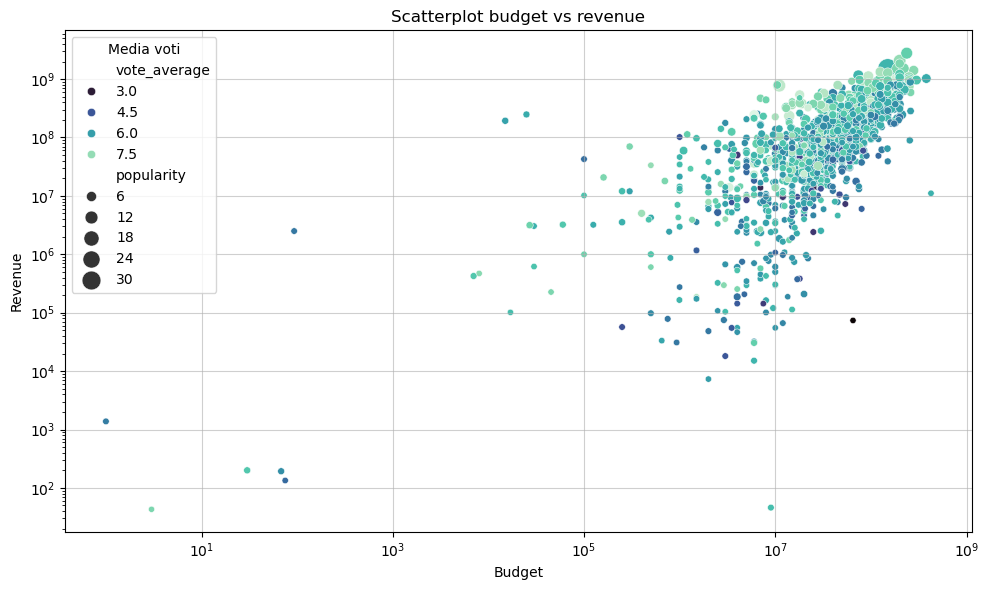

In [348]:
df_mov = pd.read_csv('movies.csv')

# 1. eliminare righe con NaN e creare una colonna roi
df_mov = df_mov.dropna(axis=0)
df_mov = df_mov[df_mov['budget'] != 0]      # considero solo i budget diversi da 0
df_mov['roi'] = (df_mov['revenue'] - df_mov['budget']) / df_mov['budget']
print('Colonna Roi: \n',df_mov['roi'])

# 2. top 5 film con roi più alto
top_5_roi = df_mov.sort_values(by='roi',ascending=False).head(5)
print(f'\nTop 5 film con ROI più alto\n {top_5_roi[['original_title', 'roi']]}')

# 3. filtra film con budget > 50 e vote_avarage > 7
film_filtered = df_mov[(df_mov['budget'] > 50_000_000) & (df_mov['vote_average'] > 7)]
print('\nFilm filtrati: \n', film_filtered[['original_title', 'budget', 'vote_average']])

# 4. barplot con top 10 film roi più alto
top_10_roi = df_mov.sort_values(by='roi', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_roi['original_title'], top_10_roi['roi'], color='blue')
plt.title('Top 10 film per ROI')
plt.xlabel('ROI')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(alpha=0.6, color='gray', linestyle='--')
plt.show()

# 5. scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_mov, x='budget', y='revenue', hue='vote_average', palette='mako', size='popularity', sizes=(20,200))
plt.title('Scatterplot budget vs revenue')
plt.legend(title='Media voti')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.grid(alpha=0.6)
plt.show()

## Esercizio 5  

Utilizza il dataset `movies.csv`.  

1. Quante **righe e colonne** ha il dataset? Successivamente elimina la colonna `overview` dal DataFrame.  
2. Trova il **regista** (`director`) che ha diretto il maggior numero di film.  
3. Calcola il **vote_average medio** per ciascun `director` e ordina i primi 10.  
4. Crea un **boxplot** dei valori di `vote_average` raggruppati per `director` (solo i 5 registi con più film).  
5. Crea un **violin plot** della distribuzione dei `vote_average` per genere (`genres`).  


Righe =  1446
Colonne =  22
Regista con il maggior numero di film registrati: John Carpenter (num. film = 15)

Top 10 registi per vote average medio: 
 director
Damien Chazelle                                                                 8.2
Morgan Spurlock                                                                 8.0
Morten Tyldum                                                                   8.0
Lenny Abrahamson                                                                8.0
Pete Docter                                                                     8.0
Tony Kaye                                                                       8.0
Lucy Walker                                                                     7.8
Don Hall|Chris Williams                                                         7.8
Jeremy Podeswa|Tim Van Patten|David Nutter|Graham Yost|Carl Franklin|Tony To    7.8
Rajkumar Hirani                                                                 7.8

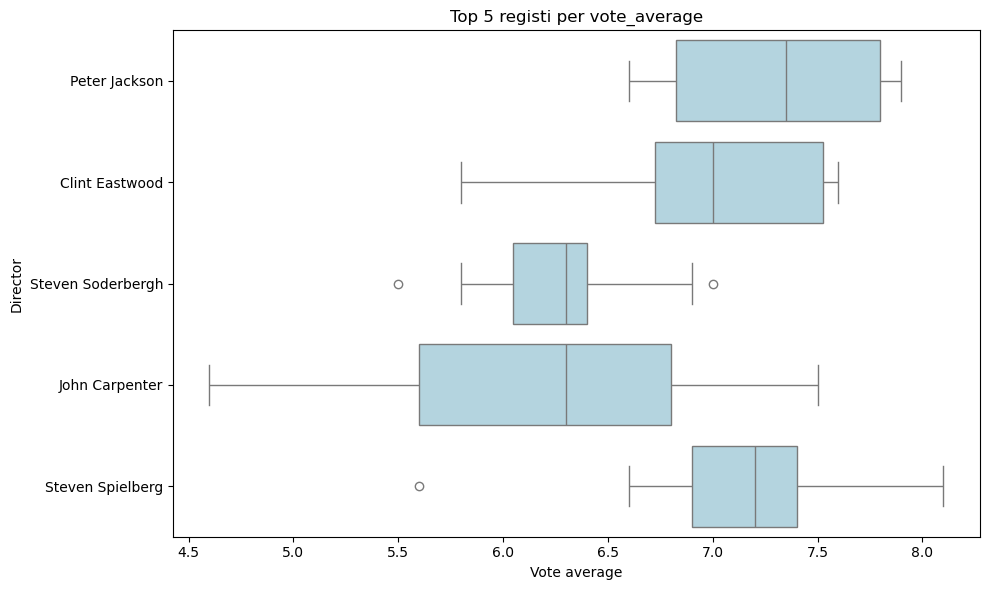

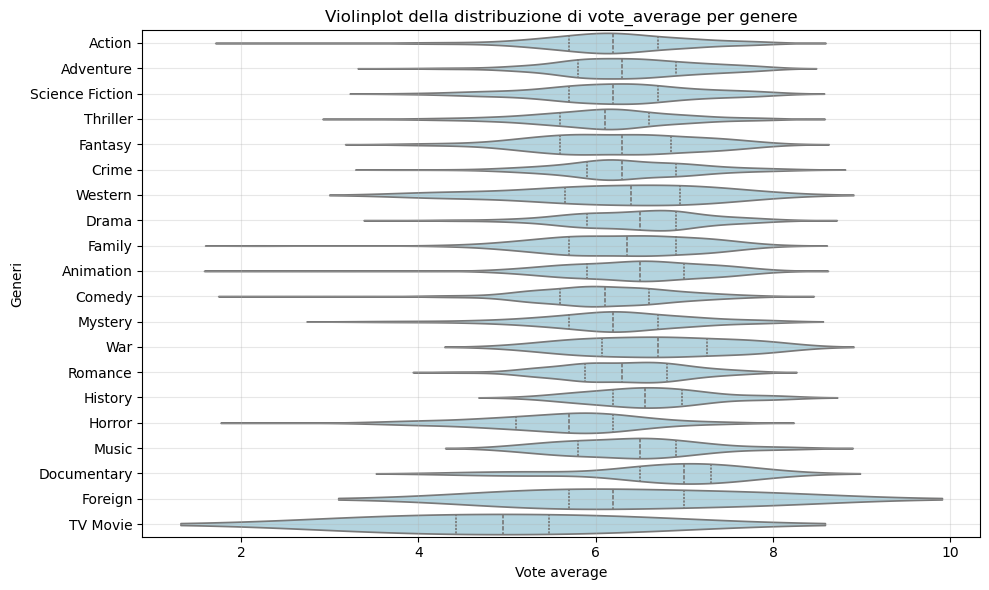

In [349]:
# 1. quante righe e quante colonne, eliminare la colonna overviw
print('Righe = ',df_mov.shape[0])
print('Colonne = ',df_mov.shape[1])
df_mov = df_mov.drop(columns='overview')

# 2. trova il regista che ha diretto il maggior numero di film
reg_max = df_mov['director'].value_counts().idxmax()
num_film = df_mov['director'].value_counts().max()
print(f'Regista con il maggior numero di film registrati: {reg_max} (num. film = {num_film})')

# 3. vote_average medio per ogni director e ordina i primi 10
vote_avg_mean = df_mov.groupby('director')['vote_average'].mean()
top_10 = vote_avg_mean.sort_values(ascending=False).head(10)
print('\nTop 10 registi per vote average medio: \n', top_10)

# 4. boxplot
top_5_reg = df_mov['director'].value_counts().head(5).index
top5_df = df_mov[df_mov['director'].isin(top_5_reg)]

plt.figure(figsize=(10,6))
sns.boxplot(data=top5_df, x='vote_average', y='director', color='lightblue')
plt.title('Top 5 registi per vote_average')
plt.xlabel('Vote average')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

# 5. violinplot
df_gen = df_mov.copy()
df_gen['genres'] = df_gen['genres'].str.split('|')
df_gen = df_gen.explode('genres')

plt.figure(figsize=(10,6))
sns.violinplot(data=df_gen, x='vote_average', y='genres', color='lightblue', density_norm='width', inner='quartile')
plt.title('Violinplot della distribuzione di vote_average per genere')
plt.xlabel('Vote average')
plt.ylabel('Generi')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

## Esercizio 6  

Hai a disposizione il dataset di coppie `(x, y)`  qui sotto riportato.

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta del tipo `y = a * x + b`.  
2. Plotta i punti originali e la retta ottenuta.  
3. Calcola **MAE** e **RMSE** tra i valori reali `y` e quelli stimati dal modello.  


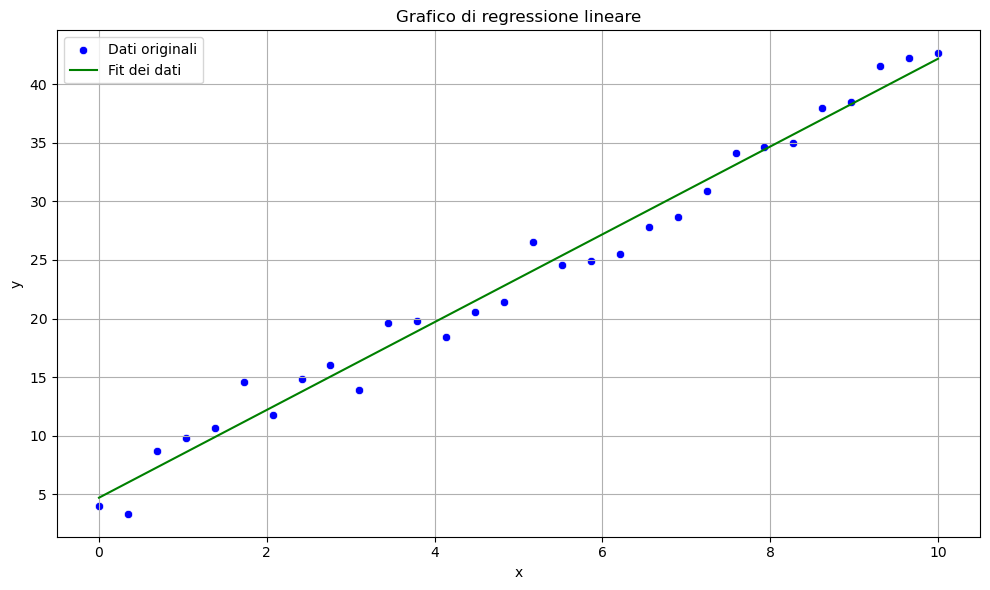

MAE = 1.370
RMSE = 1.563


In [365]:
x = np.array([
  0.0, 0.3448, 0.6897, 1.0345, 1.3793, 1.7241,
  2.0690, 2.4138, 2.7586, 3.1034, 3.4483, 3.7931,
  4.1379, 4.4828, 4.8276, 5.1724, 5.5172, 5.8621,
  6.2069, 6.5517, 6.8966, 7.2414, 7.5862, 7.9310,
  8.2759, 8.6207, 8.9655, 9.3103, 9.6552, 10.0
])

y = np.array([
  3.99,  3.33,  8.71,  9.83, 10.69, 14.59,
  11.72, 14.87, 16.06, 13.93, 19.61, 19.83,
  18.40, 20.59, 21.45, 26.51, 24.57, 24.94,
  25.55, 27.78, 28.71, 30.87, 34.14, 34.65,
  35.01, 37.94, 38.53, 41.56, 42.28, 42.65
])

# 1. stimare i parametri della retta y = a * x + b
def linear_model(x, a, b):
  return a * x + b

popt, _ = curve_fit(linear_model, x, y)
a, b = popt
y_pred = linear_model(x, a, b)

# 2. plot dei punti originali e la retta
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Dati originali', color='blue')
sns.lineplot(x=x, y=y_pred, label='Fit dei dati', color='green')
plt.title('Grafico di regressione lineare')
plt.xlabel('x')
plt.ylabel('y')
plt.yticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

# 3. calcolo del mae e rmse
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
print(f'MAE = {mae:.3f}\nRMSE = {rmse:.3f}')